# Homework 11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import utils as utils
from fractions import Fraction

from func import Func
from globalsearch import NaiveRandomSearch, SimulatedAnnealing, create_animation
from IPython.display import display, HTML

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

plt.rc('animation', html='jshtml')

---
## Example 14.3


<img src="figures/homework-11/example-14.3.png" width="600" />














<img src="figures/homework-11/figure-14.10.png" width="600" />






















---
## Exercise 14.2

<img src="figures/homework-11/exercise-14.2.png" width="600" />


In [2]:
def create_f142():
    x, y = sy.symbols('x, y')
    term1 = 3*(1-x)**2 * sy.exp(-x**2 - (y+1)**2)
    term2 = 10*(x/5 - x**3 - y**5) * sy.exp(-x**2 - y**2)
    term3 = sy.exp(-(x+1)**2 - y**2) / 3
    f = term1 - term2 - term3
    return Func(f, (x,y))

f142 = create_f142()
f142

⎡                                                                        2    
⎢                2          2                               2    2    - y  - (
⎢          2  - x  - (y + 1)    ⎛      3             5⎞  - x  - y    ℯ        
⎢3⋅(-x + 1) ⋅ℯ                - ⎝- 10⋅x  + 2⋅x - 10⋅y ⎠⋅ℯ          - ─────────
⎣                                                                           3 

      2⎤
x + 1) ⎥
       ⎥
───────⎥
       ⎦

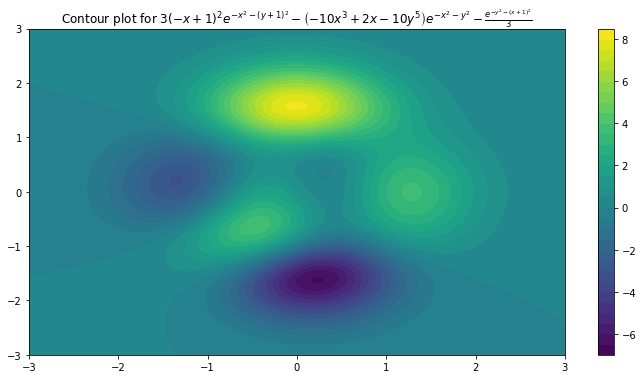

In [3]:
fig, ax = f142.plot_contour(x_limit=(-3, 3), levels=30)

---
### Naive Random Search

In [5]:
nrs = NaiveRandomSearch(f142, feasible_set=[(-3, 3), (-3, 3)])
result = nrs.run(initial_point=(0.5, -0.5), alpha=0.1, max_iterations=100, verbose=False)
anim = create_animation(fig, ax, result)
anim

In [6]:
# anim.save('figures/homework-11/animation-naive-random-search.gif', writer='imagemagick', fps=5)

---
### Simulated Annealing

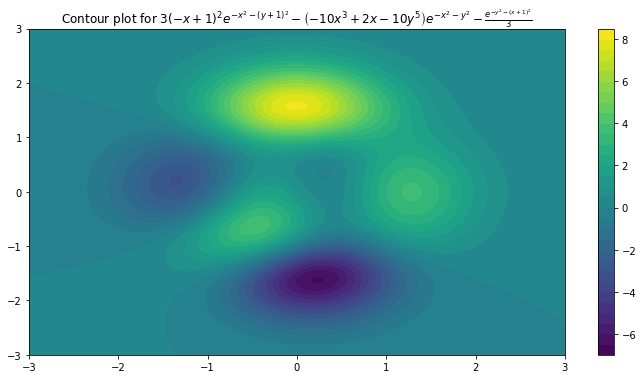

In [7]:
fig, ax = f142.plot_contour(x_limit=(-3, 3), levels=30)

In [8]:
sa = SimulatedAnnealing(f142, feasible_set=[(-3, 3), (-3, 3)])
result = sa.run(
    initial_point=(0, 2), 
    alpha=3, 
    gamma=2,
    max_tries=30,
    max_iterations=300, 
    verbose=False
)
anim = create_animation(fig, ax, result)
anim

---
## Exercise 14.3

<img src="figures/homework-11/exercise-14.3.png" width="600" />



In [9]:
from globalsearch_pso import PSO, create_animation

In [10]:
def create_peaks_func():
    x, y = sy.symbols('x, y')
    term1 = 3*(1-x)**2 * sy.exp(-x**2 - (y+1)**2)
    term2 = 10*(x/5 - x**3 - y**5) * sy.exp(-x**2 - y**2)
    term3 = sy.exp(-(x+1)**2 - y**2) / 3
    f = term1 - term2 - term3
    return Func(f, (x,y))

f143 = create_peaks_func()
f143

⎡                                                                        2    
⎢                2          2                               2    2    - y  - (
⎢          2  - x  - (y + 1)    ⎛      3             5⎞  - x  - y    ℯ        
⎢3⋅(-x + 1) ⋅ℯ                - ⎝- 10⋅x  + 2⋅x - 10⋅y ⎠⋅ℯ          - ─────────
⎣                                                                           3 

      2⎤
x + 1) ⎥
       ⎥
───────⎥
       ⎦

In [11]:
# For reproducibility, we seed the random number generator
np.random.seed(42)

In [12]:
pso = PSO(f143, feasible_set=[(-3, 3), (-3, 3)], num_particles=20)
result = pso.run(w=0.8, c1=2, c2=0.1, max_iterations=20)

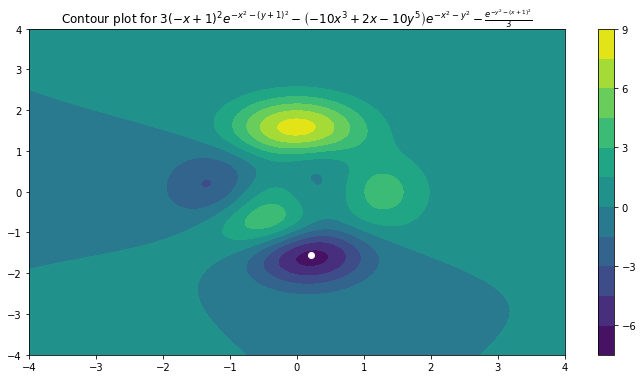

In [13]:
fig, ax = f143.plot_contour()
best_point = result['best_point']
ax.scatter(best_point[0], best_point[1], color='#ffffff')

In [14]:
create_animation(fig, ax, result, show_annotations=False)